# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

In [ ]:
X_train

,bias,experience,salary
71,1,5.3,48000
124,1,8.1,66000
184,1,3.9,60000
97,1,0.2,45000
149,1,1.1,66000
...,...,...,...
67,1,6.7,64000
192,1,4.8,73000
117,1,7.0,86000
47,1,7.6,78000


## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [ ]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [ ]:
# parameter 개수
N = len(X_train.loc[0])

In [ ]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.1151227 , 0.55999468, 0.90477454])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [ ]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z +=X[i]*parameters.T[i]
    return z

## Logistic Function

## $p =\frac{1}{1+e^{-Z}}$

In [ ]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p =np.exp(z)/(1 + np.exp(z))   
    return p

In [ ]:
logistic(X_train.iloc[1], parameters)

0.6939845801205822

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma((y_ilog p(X_i))+(i-y_i)log(1-p(X_i)))$

In [ ]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss =-np.sum((y*np.log(p+1e-7)+(1-y)*np.log(1-p+1e-7)))
    return loss

In [ ]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters)
    loss = (np.sum((y-y_hat)**2))/2
    return loss

In [ ]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0

    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss +=loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [ ]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1412032433887556

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=\Sigma(y_i-\theta^{T}X_i)X_{ik}$
## ${\partial\over{\partial \theta_j}}l(p)=\Sigma((y_i-p_i)X_{ij})$ 

In [ ]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(parameters.T,X)
        gradient =X[j]*np.sum(mse_i(X,y,parameters))
    else:
        p =logistic(X,parameters)
        gradient = np.sum(minus_log_cross_entropy_i(X,y,parameters)*X[j])
    return gradient

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

0.22187595206854419

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [ ]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X,y,parameters,j,model) #???
    
    return gradients

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[140.97499592626764, 47.583196252581274, 59.1660231782261]

## mini-batch
인덱스로 미니 배치 나누기

In [ ]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]

    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 총 데이터 갯수와 총 batch의 갯수로 나눠 크기를 정하고, for문을 이용해 idx_list에 그 갯수 단위로 나누어 배치 안에서 들어갈 원래 데이터의 인덱스를 할당

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [ ]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수


    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters

In [ ]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.10572437, 0.55682247, 0.90083014])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  주어진 반복 횟수만큼 반복함
- num_epoch:반복 횟수
<br>

BGD: 학습 한 번에 모든 데이터셋에 대해 기울기를 구한다<br>
SGD: 학습 한 번에 임의의 데이터에 대해서만 기울기를 구한다<br>
MGD:학습 한 번에 데이터셋의 일부에 대해서만 기울기를 구한다<br>
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD
batch_size=whole -> BGD

In [ ]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)

    loss_function_set = minus_log_cross_entropy_i if model == 'logistic' else mse_i  #??
   

    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)


    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,:]
            y_batch = y_train.iloc[idx]

            gradients = batch_gradient(X_batch,y_batch,parameters,model)
            parameters = step(parameters,gradients,learning_rate,batch_size)
            new_loss = batch_loss(X_train,y_train,parameters,loss_function_set,batch_size)
            #batch_lo
          #중단 조건
            if (abs(new_loss - loss) < tolerance):
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%10 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [ ]:
new_param_bgd = gradient_descent(X_train, y_train,tolerance=0.0001,learning_rate=0.03,batch_size=10)
new_param_bgd

epoch: 0  loss: 10.384474498817445  params: [0.06282128 0.32021444 0.0671208 ]  gradients: [0.02319679042253078, 0.01083104465709506, 0.006146251687961657]
epoch: 10  loss: 15.190226619486861  params: [-3.01555576 -0.43800384  0.67217582]  gradients: [0.042010275730611946, 0.01288900182204148, -0.01790615481993918]


array([-7.76429633, -2.6546586 ,  2.36921306])

In [ ]:
new_param_sgd = gradient_descent(X_train, y_train,model='logistic',learning_rate=0.01,num_epoch=100)
new_param_sgd

epoch: 0  loss: 9.384254909582271  params: [0.49666733 0.69915083 0.73041164]  gradients: [0.0065276048767913064, 0.006561185262934337, 0.007249946515040065]
epoch: 10  loss: 6.681669823171033  params: [-0.28318092  0.47358493  0.45145428]  gradients: [0.003717252690762668, 0.0036064258502923863, 0.0037200965483413072]
epoch: 20  loss: 6.014886821101151  params: [-0.90751657  0.34160824  0.41405151]  gradients: [0.002625492361900312, 0.00241217841545281, 0.0021462547717291188]
epoch: 30  loss: 6.403961220279296  params: [-1.520747    0.21611847  0.51918454]  gradients: [0.0022156020889159615, 0.00190082123472323, 0.0012836511174167781]
epoch: 40  loss: 7.675053237868386  params: [-2.21615331  0.05896604  0.7518816 ]  gradients: [0.0021877873188776197, 0.001740162135710147, 0.0007181022604295842]
epoch: 50  loss: 9.95348763596832  params: [-3.08653164 -0.15874657  1.13338982]  gradients: [0.0024845345842513756, 0.001846077870765053, 0.00030166644858176437]
epoch: 60  loss: 13.5160243904

array([-14.55841971,  -3.89854602,   6.7253625 ])

In [ ]:
new_param_mgd = gradient_descent(X_train, y_train, tolerance=0.00001,learning_rate=0.005)
new_param_mgd

epoch: 0  loss: 6.504758067187395  params: [0.004923   0.45854878 0.15035558]  gradients: [0.0017597478360885938, 0.0016462251964299024, 0.0017402567434196793]
epoch: 10  loss: 5.8883879634890555  params: [-0.30368201  0.41035716  0.10806106]  gradients: [0.001444893390281405, 0.0013230536286020687, 0.0013280879133829322]
epoch: 20  loss: 5.567791049487332  params: [-0.58916467  0.36633193  0.09835586]  gradients: [0.0012371822912091257, 0.001105777503608466, 0.0010327681589015318]


array([-0.71143424,  0.3485141 ,  0.10394998])

### Predict Label

In [ ]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[40,  0],
       [10,  0]])

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.8


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [ ]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [ ]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [ ]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.32052159, 2.97658734])

In [ ]:
#경사하강법
new_param = gradient_descent(X, y,learning_rate=0.05,num_epoch=50)
new_param

epoch: 0  loss: -15.680002257584045  params: [1.13370145 1.28109136]  gradients: [-0.044670969573699176, -0.044893633807009115]


array([26.83430627, 23.01215424])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

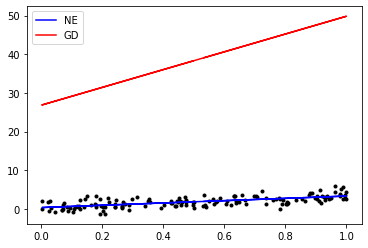

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()